# Reading and viewing images

## Goal

The purpose of this notebook is to demonstrate how to load, view, and manipulate images to make them ready for processing.

We will exemplify the operations using the two most common libraries:

- Matplotlib
- PIL

## The PIL library

The PIL, or Python Image Processing, library brings the ability to process images to Python. The library supports multiple file formats and powerful image processing tools.

Some of the uses of the library are Archiving, batch processing images, Display, supporting various interfaces (GUIs) and Processing, such as resizing, rotation, histogram, among others.

### Importing the PIL library

In [1]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem

In [2]:
img = Image.open('../figures/versicolor.jpg')

In [3]:
type(img)
img.size, img.bits, img.format, img.mode

((400, 400), 8, 'JPEG', 'RGB')

### Showing a PIL image

In jupyter-notebook, calling the object containing the image causes it to be shown.

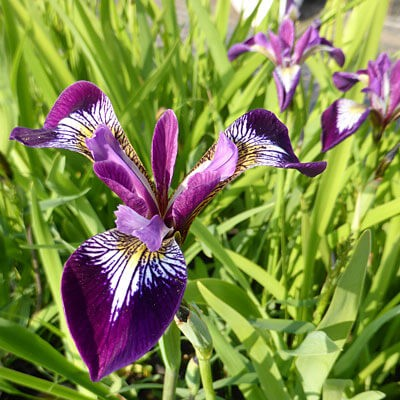

In [4]:
img

Or you can also use the display method of the IPython.display class.

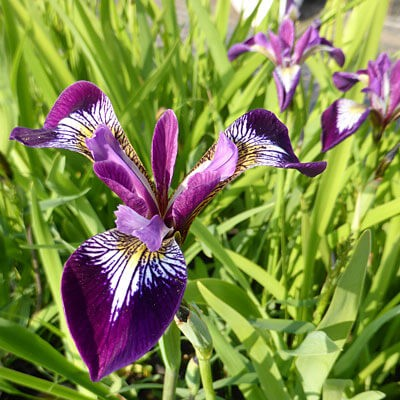

In [5]:
display(img)

### Splitting image channels

As the previous image is in color, it contains the three channels (RGB - red, green, blue). With the split method it is possible to divide the image channels and view each of them separately.

In [6]:
r,g,b = img.split()

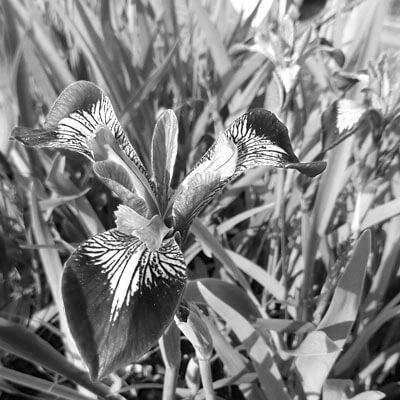

In [7]:
r

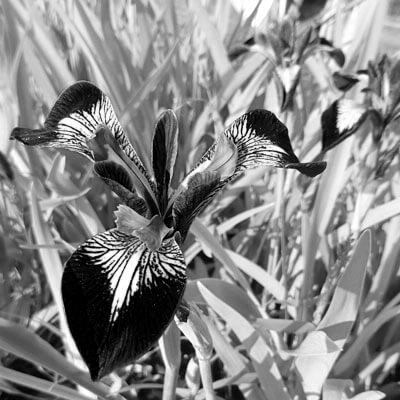

In [8]:
g

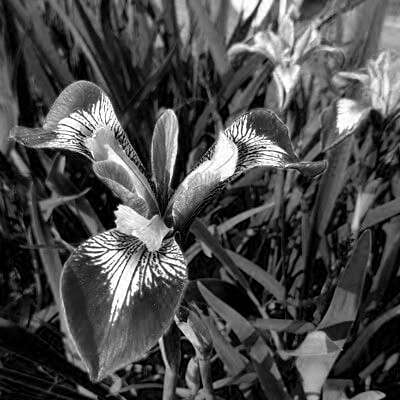

In [9]:
b

### Loading image with different channels

It is also possible to load the image with just one channel, in grayscale, using the convert method with the L parameter.


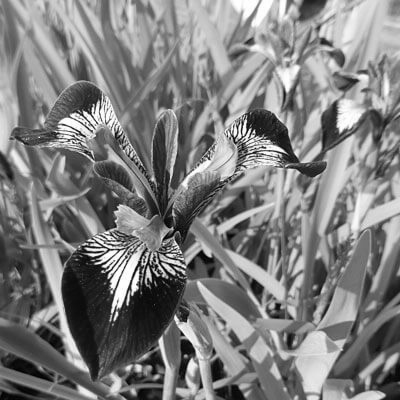

In [10]:
img1 = Image.open('../figures/versicolor.jpg').convert('L')
img1

### Saving a disk image in a different format

To save an image to disk, we use the save method passing the path to save the image as a parameter. If it is necessary to change the image format, it is possible to pass the desired format as a parameter.


In [11]:
img1.save('../figures/versicolor_BW.png','png')

### Transforming an image into a numpy array

To transform the image into a numpy array, we use the array method of the numpy class.

In [12]:
numpy_img = np.array(img)

### Showing image dimensions

In this case, the image has 3 dimensions: the first is the height of the image, the second is the width of the image and the third contains the R, G, B channels of the image.

In [13]:
numpy_img.shape

(400, 400, 3)

In the case above, the image is represented in *channels last* format. There are two main ways to represent the image in the array:

- *channels first*
- *channels last*

Depending on the libraries to be used, sometimes we need to change the dimensions and pass the channel information to the first position. This configuration is known as *channels-first*.

In [14]:
numpy_img.transpose(2,0,1).shape

(3, 400, 400)

## The Matplotlib library

Matplotlib is a library for 2D plotting. With it you can plot points, functions, statistics and images.

### Importing the library

Note: when Matplotlib is used within Jupyter-Notebook, it is necessary to use the %matplotlib inline command for the graphs to be displayed.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

### Showing an image in Matplotlib

Note that to display an image with the Matplotlib library, it must already be loaded into an object.

The Matplotlib library can display both colored images in PIL format and NumPy arrays in channels last format.

### Showing an image in numpy array format:

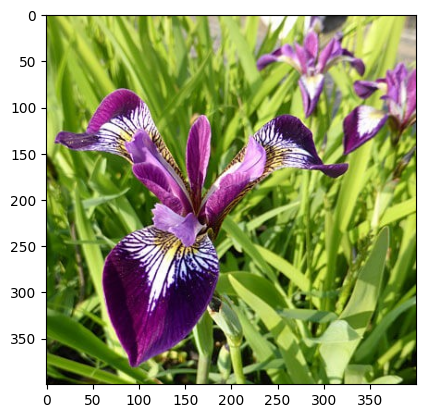

In [16]:
plt.imshow(numpy_img)

### Showing an image in PIL format:

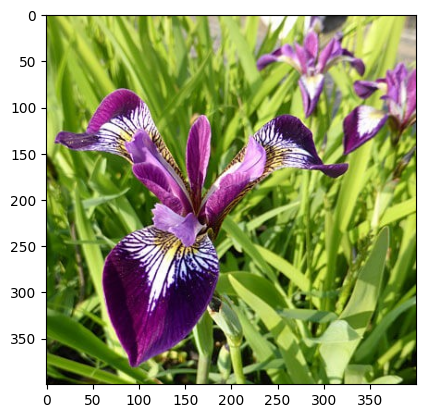

In [17]:
plt.imshow(img)

### Manipulating the plot

As it is a plotting library, it is possible to manipulate various plot information, such as grid, title, axis label, figure size, among others.


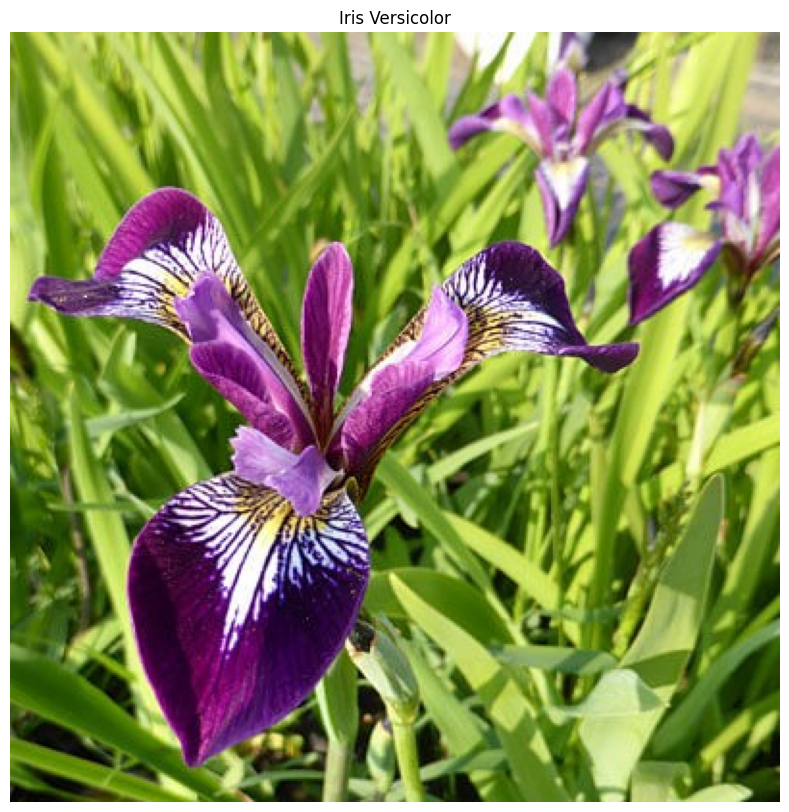

In [18]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(numpy_img)
plt.axis('off')
plt.show()

### Showing monochrome images (1 channel) in Matplotlib

In [19]:
img2 = Image.open('../figures/versicolor_BW.png')
numpy_img2 = np.array(img2)
numpy_img2.shape

(400, 400)

By default, Matplotlib uses a false color (pseudo color) table when viewing a single-channel image. The colorbar() function shows the color table used:

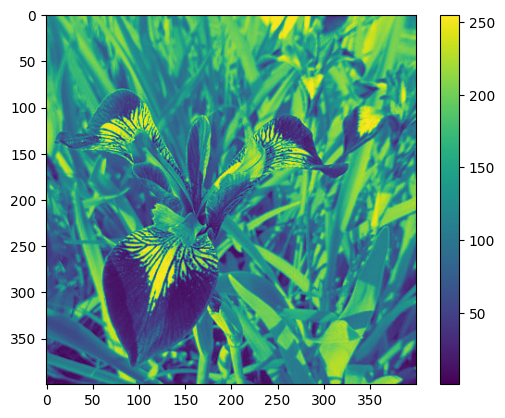

In [20]:
plt.imshow(numpy_img2)
plt.colorbar();

To view the image in gray tones, the gray table must be entered in the cmap parameter of imshow.

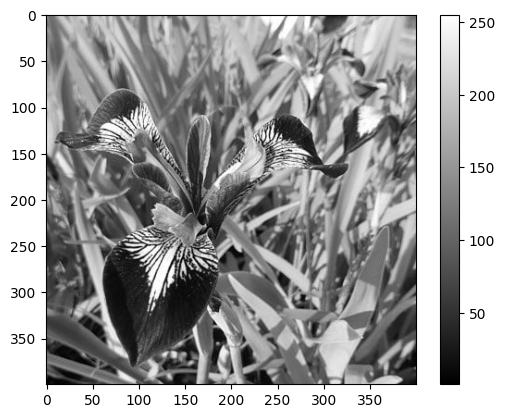

In [21]:
plt.imshow(numpy_img2, cmap='gray')
plt.colorbar()

### Reading images with Matplotlib

There is special care when using Matplotlib to read images. Depending on the image file format, the NumPy array read may be normalized.

In [22]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor_BW.png')
f.shape, f.dtype, f.min(), f.max()

((400, 400), dtype('float32'), 0.003921569, 1.0)

In [23]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor.jpg')
f.shape, f.dtype, f.min(), f.max()

((400, 400, 3), dtype('uint8'), 0, 255)